In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.neuralnetwork.rnn import RNN

In [2]:
r = RNN(loss='mae',metrics=['mse'], lstm=[32,64,128],dense=[128,64,32], window_size=200)
r.get_data(file_name='encoded_smooth.npy')
r.build_model()
r.train_model()

Epoch 1/200
201/201 [==============================] - 61s 266ms/step - loss: 9.4374 - mse: 368.5934 - val_loss: 7.7514 - val_mse: 320.3998
Epoch 2/200
201/201 [==============================] - 53s 265ms/step - loss: 7.4953 - mse: 270.6397 - val_loss: 6.2929 - val_mse: 236.0865
Epoch 3/200
201/201 [==============================] - 54s 267ms/step - loss: 5.8966 - mse: 181.4032 - val_loss: 5.4468 - val_mse: 170.8296
Epoch 4/200
201/201 [==============================] - 53s 266ms/step - loss: 4.9835 - mse: 128.4093 - val_loss: 4.8487 - val_mse: 143.4461
Epoch 5/200
201/201 [==============================] - 54s 267ms/step - loss: 4.4133 - mse: 96.3304 - val_loss: 4.2493 - val_mse: 107.1038
Epoch 6/200
201/201 [==============================] - 58s 289ms/step - loss: 3.9766 - mse: 74.3789 - val_loss: 4.1207 - val_mse: 103.7164
Epoch 7/200
201/201 [==============================] - 115s 575ms/step - loss: 3.8161 - mse: 61.3174 - val_loss: 4.0046 - val_mse: 95.8372
Epoch 8/200
201/201 [==

KeyboardInterrupt: 

In [3]:
test = np.load('dataset/encoded_smooth.npy')[0]

forecast = r.predict_future(test[:r.window_size],1000-r.window_size)

forecast_full = np.concatenate((test[:r.window_size], forecast), axis=0)

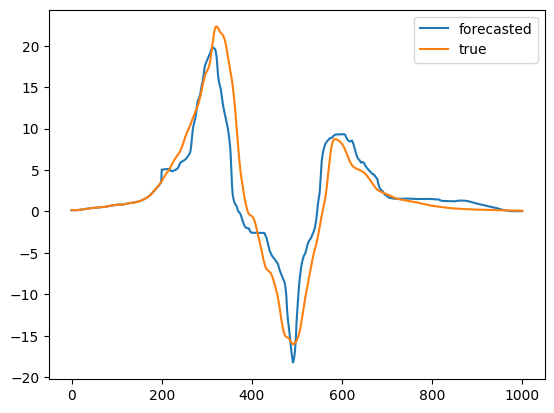

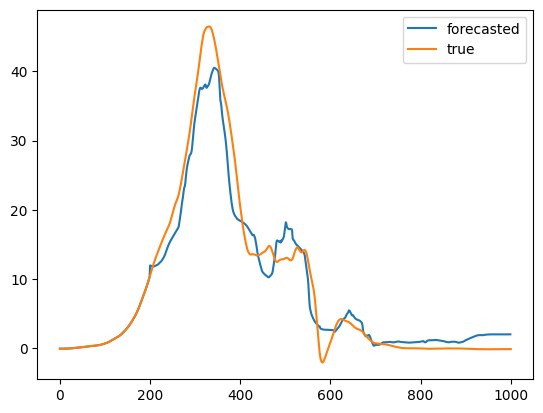

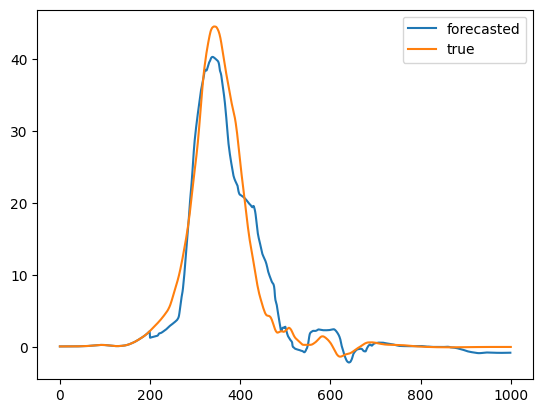

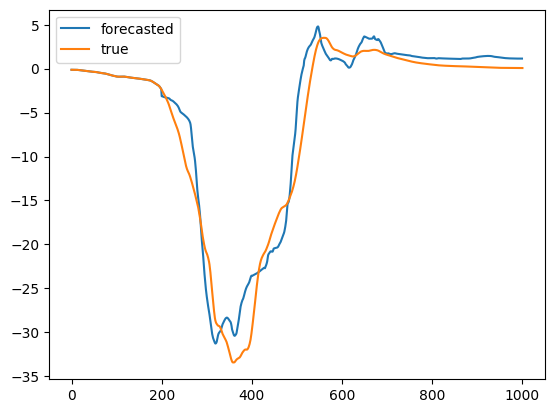

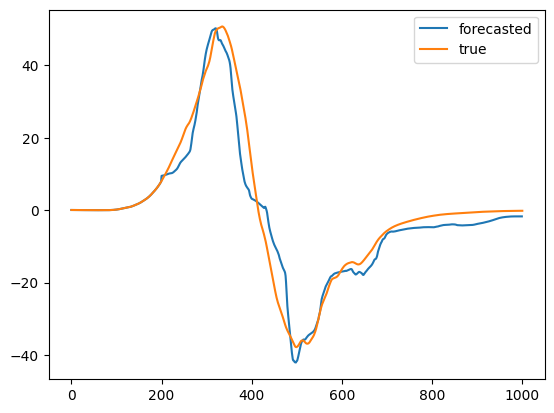

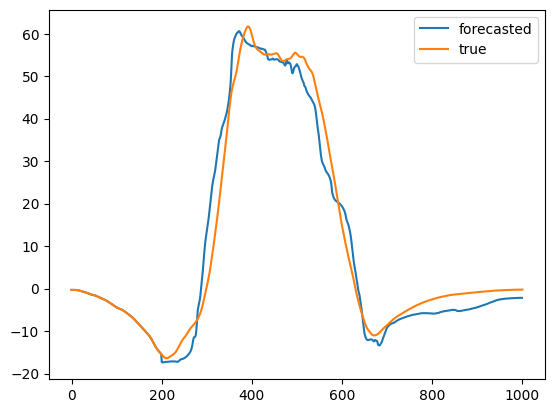

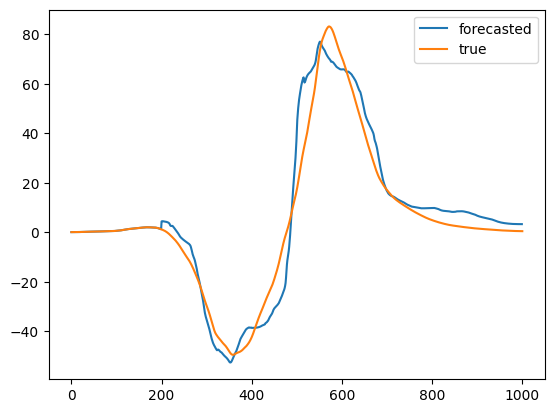

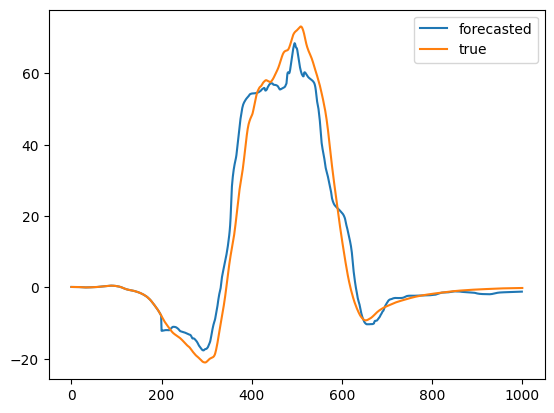

In [4]:
for i in range(8):
    plt.plot(forecast_full[:, i])
    plt.plot(test[:, i])
    plt.legend(['forecasted','true'])
    # plt.vlines(r.window_size, ymin=np.min(test[:,i]),ymax=np.max(test[:,i]), colors='red')
    plt.show()

In [6]:
from scripts.neuralnetwork.autoencoder import Autoencoder
a = Autoencoder(model_name='bubububu')
decoded = a.decode(forecast_full)
    

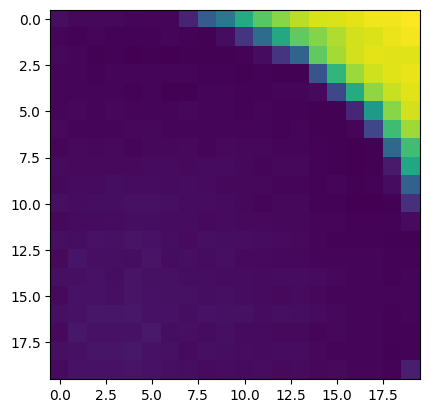

In [7]:
plt.imshow(decoded[600,:,:,0])

In [ ]:
r.save_model('rnnbubu2')